In [8]:
import numpy as np
import matplotlib.pyplot as plt
from NumOpt.backtracking import backtracking

In [9]:
def func(x):
    assert len(x) == 2, "Input must be a 2-dimensional vector."
    x1, x2 = x[0], x[1]
    f = 0.1*x1**6 - 1.5*x1**4 + 5*x1**2 + 0.1*x2**4 + 3*x2**2 - 9*x2 + 0.5*x1*x2
    return f

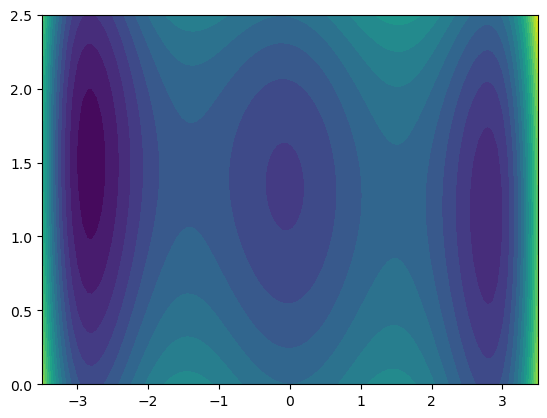

In [10]:
N = 100
x1 = np.linspace(-3.5, 3.5, N)
x2 = np.linspace(0, 2.5, N)
X1, X2 = np.meshgrid(x1, x2, indexing='ij')
F = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        F[i, j] = func([X1[i, j], X2[i, j]])
plt.contourf(X1, X2, F, levels=20, cmap='viridis')

In [11]:
xmin1, xhist1 = backtracking(func, x0=[-1.5, 2.2])
xmin2, xhist2 = backtracking(func, x0=[1.5, 2.2])

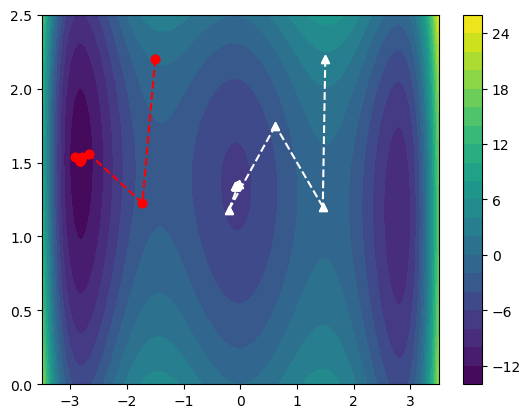

In [12]:
plt.contourf(X1, X2, F, levels=20, cmap='viridis')
plt.colorbar()

lstyles = ['r--o', 'w--^']
isol = 0
for xmin, xhist in [(xmin1, xhist1), (xmin2, xhist2)]:
    for ix in range(len(xhist)):
        xcurr = xhist[ix]
        if ix == 0:
            plt.plot(xcurr[0], xcurr[1], lstyles[isol])
        else:
            xprev = xhist[ix - 1]
            plt.plot([xprev[0], xcurr[0]], [xprev[1], xcurr[1]], lstyles[isol])
    isol += 1

